In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [ ]:
df = pd.read_csv(r'C:\Users\cesar\Downloads\water_potability.csv')

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Limpieza

In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df['ph'].fillna(value=df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(), inplace=True)

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

Como se puede observar dentro de la última tabla, ya no se cuenta con valores faltantes, pues estos fueron llenados con los promedios de sus columnas

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Normalizacion

In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(scale, columns = df.columns)
df_scale

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


## PCA

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
pca = PCA() #definir
pca.fit(df_scale) #ajustar

PCA()

In [ ]:
pca.explained_variance_

array([0.23805766, 0.02229773, 0.02128803, 0.01996458, 0.01660955,
       0.01588693, 0.01550224, 0.01422138, 0.01057376, 0.00964676])

In [ ]:
pca.explained_variance_ratio_

array([0.61986335, 0.05805966, 0.05543057, 0.0519845 , 0.04324856,
       0.04136697, 0.04036532, 0.03703015, 0.02753234, 0.02511859])

In [ ]:
pca_summary_df = pd.DataFrame({'Proporción de la varianza': pca.explained_variance_ratio_,
                               'Proporción acumulada': np.cumsum(pca.explained_variance_ratio_)})

In [ ]:
pca_summary_df = pca_summary_df.transpose()
pca_summary_df

,0,1,2,3,4,5,6,7,8,9
Proporción de la varianza,0.619863,0.058060,0.055431,0.051985,0.043249,0.041367,0.040365,0.037030,0.027532,0.025119
Proporción acumulada,0.619863,0.677923,0.733354,0.785338,0.828587,0.869954,0.910319,0.947349,0.974881,1.000000


In [ ]:
pca_summary_df.columns = ['PC' + str(pc) for pc in range(1, len(pca_summary_df.columns) + 1)]
pca_summary_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Proporción de la varianza,0.619863,0.058060,0.055431,0.051985,0.043249,0.041367,0.040365,0.037030,0.027532,0.025119
Proporción acumulada,0.619863,0.677923,0.733354,0.785338,0.828587,0.869954,0.910319,0.947349,0.974881,1.000000


In [ ]:
components = np.arange(pca.n_components_) + 1
components

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
variance = pca.explained_variance_ratio_

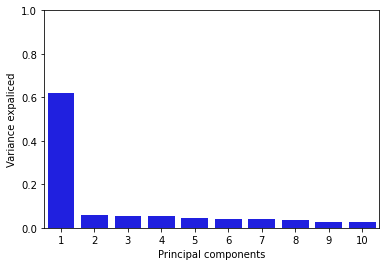

In [ ]:
sns.barplot(x = components, y = variance, color = 'b')
plt.xlabel('Principal components')
plt.ylabel('Variance expaliced')
plt.ylim(0,1)
plt.show()

In [ ]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), columns = pca_summary_df.columns, index = df.columns)
pca_components_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ph,-0.000855,-0.106567,-0.039946,0.061428,0.091878,0.086348,0.177421,0.093777,0.955527,0.118626
Hardness,-0.003628,-0.077840,-0.040876,-0.032943,0.158052,0.018274,0.534059,0.753340,-0.161603,-0.294960
Solids,0.010921,0.591724,0.708496,-0.241231,-0.046380,-0.001548,-0.106794,0.130230,0.146822,-0.193672
Chloramines,0.006409,-0.105243,-0.170675,-0.010123,-0.250213,-0.045336,-0.743334,0.577922,0.091809,-0.004563
Sulfate,-0.004633,-0.118957,-0.139285,0.042264,0.049853,0.018978,-0.146774,-0.257091,0.138949,-0.924581
Conductivity,-0.002570,0.133708,0.197064,0.962522,-0.052623,-0.089470,-0.005664,0.066473,-0.027425,-0.029259
Organic_carbon,-0.008370,-0.045671,0.094860,0.085677,0.461873,0.843371,-0.209960,0.033212,-0.097403,0.047216
Trihalomethanes,0.001976,-0.063085,0.026478,0.006619,-0.826513,0.506087,0.227464,-0.028855,-0.004746,-0.058556
Turbidity,0.000573,0.763693,-0.630610,0.034520,0.006788,0.119783,0.043911,0.016498,0.035964,-0.005011
Potability,0.999862,-0.007064,-0.005863,0.005987,0.008354,0.006297,0.005094,-0.003008,-0.002215,-0.002670


In [ ]:
pca = PCA(n_components = 3)
pca.fit(preprocessing.scale(df))

PCA(n_components=3)

In [ ]:
pca.explained_variance_

array([1.2062978 , 1.14018056, 1.06556663])

In [ ]:
pca.explained_variance_ratio_

array([0.12059296, 0.11398325, 0.10652414])

In [ ]:
pca_summary_df = pd.DataFrame({'Proporción de la varianza': pca.explained_variance_ratio_,
                               'Proporción acumulada': np.cumsum(pca.explained_variance_ratio_)})
                               
pca_summary_df = pca_summary_df.transpose()
pca_summary_df.columns = ['PC' + str(pc) for pc in range(1, len(pca_summary_df.columns) + 1)]

pca_summary_df

,PC1,PC2,PC3
Proporción de la varianza,0.120593,0.113983,0.106524
Proporción acumulada,0.120593,0.234576,0.341100


In [ ]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), columns = pca_summary_df.columns, index = df.columns)
pca_components_df

,PC1,PC2,PC3
ph,-0.329565,-0.513798,0.036694
Hardness,-0.017509,-0.610605,0.365602
Solids,0.663872,0.006282,-0.202290
Chloramines,-0.214227,0.362433,0.370996
Sulfate,-0.571704,0.333483,-0.237979
Conductivity,0.064029,-0.076287,-0.431794
Organic_carbon,-0.133857,-0.217081,-0.498309
Trihalomethanes,0.018607,0.019034,0.281985
Turbidity,0.165820,0.217738,-0.027320
Potability,0.166599,0.140890,0.338785


### k - means     

In [ ]:
km = KMeans(n_clusters=3)
km.fit_predict(df_scale)

array([2, 1, 2, ..., 0, 0, 0])

In [ ]:
km.cluster_centers_

array([[ 5.05339595e-01,  5.38168479e-01,  3.62246029e-01,
         5.33646812e-01,  5.79052212e-01,  4.26503917e-01,
         4.58271744e-01,  5.33785861e-01,  4.76144505e-01,
         1.00000000e+00],
       [ 4.79772107e-01,  5.23570454e-01,  3.93076105e-01,
         5.30779393e-01,  5.80674460e-01,  4.61172493e-01,
         4.57936584e-01,  5.27633934e-01,  5.82737287e-01,
        -1.66533454e-16],
       [ 5.30988928e-01,  5.58619460e-01,  3.13569337e-01,
         5.24594806e-01,  5.85970785e-01,  3.98184411e-01,
         4.73783944e-01,  5.36067675e-01,  3.74027468e-01,
        -5.55111512e-17]])

In [ ]:
df_scale['Clusters'] = km.labels_
df_scale.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Clusters
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0,2
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0,1
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0,2
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0,1
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0,2


In [ ]:
df_scale.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability',
       'Clusters'],
      dtype='object')

<AxesSubplot:xlabel='ph', ylabel='Conductivity'>

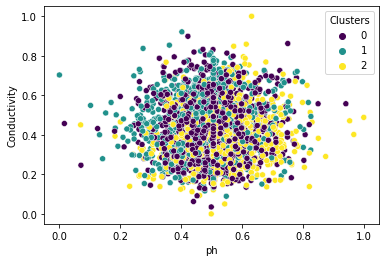

In [ ]:
sns.scatterplot(x ='ph', y ='Conductivity' , hue ='Clusters', data = df_scale, palette = 'viridis')

## decision tree

In [ ]:
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'] 
X = df[columns]
y = df.Potability 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
tree = DecisionTreeClassifier()
model_tree = tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

In [ ]:
y_pred = model_tree.predict(X_test)

In [ ]:
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data, 
                filled=True, rounded=True, 
                special_characters=True, feature_names=columns, class_names=["0","1"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


In [ ]:
results = pd.DataFrame({"Real": y_test, "Predicted":y_pred})
results = results.sample(n = 20)
results

,Real,Predicted
777,1,1
1307,0,0
1736,0,0
959,0,1
1041,0,1
1703,0,1
1064,0,0
1386,0,1
82,0,0
428,0,0


## modelos de clasificación

In [ ]:
K = range (2, 12)
inertias = []
for i in K:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scale)
    inertias.append(kmeans.inertia_)

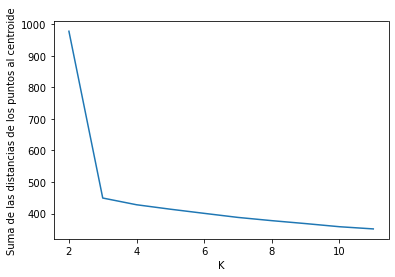

In [ ]:
plt.plot(K, inertias)
plt.xlabel("K")
plt.ylabel('Suma de las distancias de los puntos al centroide')
plt.show()

In [ ]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth =3, splitter = "best")

In [ ]:
model_tree = tree.fit(X_train, y_train)

In [ ]:
y_pred = model_tree.predict(X_test)

Valor F

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.62970498474059

In [ ]:
metrics.f1_score(y_test, y_pred)

0.28627450980392155

confusion matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[546,  39],
       [325,  73]], dtype=int64)

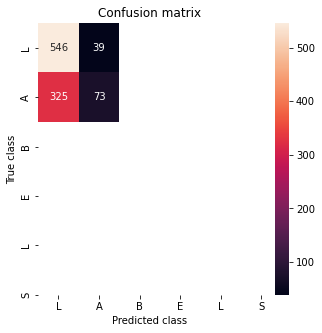

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels='LABELS', yticklabels='LABELS', annot=True, fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## curva ROC y AUC

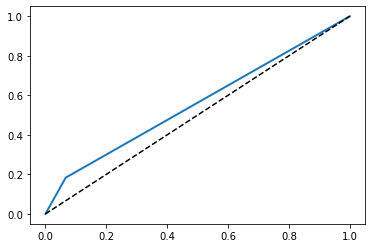

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth =2, label=label)
    plt.plot([0,1],[0,1],'k--')
plot_roc_curve(fpr, tpr)
plt.show()

## validación cruzada

In [ ]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    print('Índice de entrenamiento: ', train_index, '\n')
    print('Índice de prueba: ', test_index)
    X_train, X_test, y_train, y_test = X[train_index], X[X_test], y[y_train], y[y_test]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

## mejor clasificador

Una vez realizados los diversos algoritmos para clasificar, tomando en cuenta el proceso de limpieza y normalización de datos, así como el entrenamiento de los algoritmos, se puede concluir que el mejor algoritmo de clasificación para estos datos es el de decision tree, ya que este se adapta de mejor manera con los datos en base a la precisión presentada.